In [1]:
#Notes: Regression problems can be solved using specific estimators within TF

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf

/home/clemente/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [5]:
noise = np.random.randn(len(x_data))

In [6]:
noise

array([-1.50548593e+00,  5.55849754e-01, -2.66576931e+00, ...,
       -8.54364473e-04, -5.71332657e-01, -5.32201055e-01])

In [7]:
# model y = m*x + b; b = 5

In [8]:
# This is the true model that will generate the y
y_true = (0.5 * x_data) + 5 + noise

In [9]:
#### Generating linearly dependent data

In [10]:
x_df = pd.DataFrame(data = x_data, columns=['X Data'])
y_df = pd.DataFrame(data = y_true, columns=['Y'])

In [11]:
y_df.head()

,Y
0,3.494514
1,5.555855
2,2.334241
3,5.489436
4,6.037761


In [12]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [13]:
my_data = pd.concat([x_df, y_df], axis = 1)

In [14]:
my_data.head()

,X Data,Y
0,0.00000,3.494514
1,0.00001,5.555855
2,0.00002,2.334241
3,0.00003,5.489436
4,0.00004,6.037761


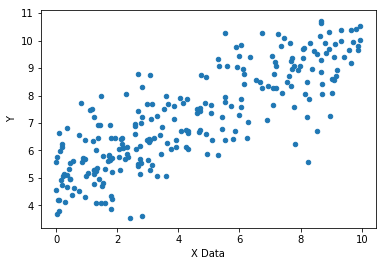

In [15]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y = 'Y')

### Model Preparation

In [16]:
# Preparing batch to be fed
batch_size = 8

In [17]:
#Initializing two random variables
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [18]:
#Creating input and output placeholders
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [19]:
#Defining model
y_model = m*xph + b

In [20]:
#Creating loss function and optimizer
loss = tf.reduce_sum(tf.square(yph - y_model))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
#Defining the training
train = optimizer.minimize(loss)

In [21]:
# TF variable initialization
init = tf.global_variables_initializer()

In [22]:
with tf.Session() as sess:
    
    sess.run(init) # Starting the session
    
    batches = 1000 # 1000 will be enough
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size = batch_size) # generating random numbers
        
        #defining the feed dictionary and using the random numbers as indexes to draw from the x_data array
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m, b])

In [23]:
model_m

0.48785898

In [24]:
model_b

4.875121

In [25]:
y_hat = x_data*model_m + model_b

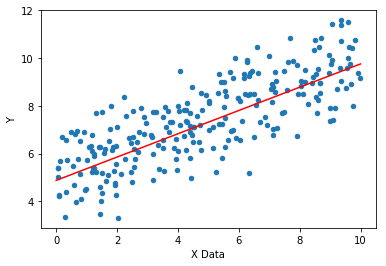

In [26]:
my_data.sample(250).plot(kind='scatter', x = 'X Data', y= "Y")
plt.plot(x_data, y_hat, 'r')

## TF ESTIMATOR

In [27]:
feat_cols = [ tf.feature_column.numeric_column('x', shape=[1]) ]

In [28]:
#Calling the estimator model
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpxbjtc_ey', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f35b2940b70>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size= 0.3, random_state = 101)

In [30]:
print(x_train.shape)

(700000,)


In [31]:
x_eval.shape

(300000,)

In [32]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [33]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=None, shuffle=False)

In [34]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=None, shuffle=False)

In [35]:
estimator.train(input_fn=input_func, steps= 1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpxbjtc_ey/model.ckpt.
INFO:tensorflow:loss = 469.44376, step = 1
INFO:tensorflow:global_step/sec: 481.644
INFO:tensorflow:loss = 35.340622, step = 101 (0.208 sec)
INFO:tensorflow:global_step/sec: 447.166
INFO:tensorflow:loss = 19.028883, step = 201 (0.229 sec)
INFO:tensorflow:global_step/sec: 532.724
INFO:tensorflow:loss = 8.846451, step = 301 (0.183 sec)
INFO:tensorflow:global_step/sec: 592.908
INFO:tensorflow:loss = 10.697594, step = 401 (0.168 sec)
INFO:

In [36]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-11-15:42:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxbjtc_ey/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-01-11-15:42:23
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0671507, global_step = 1000, label/mean = 7.4779096, loss = 8.537206, prediction/mean = 7.3041735
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100

In [ ]:
eval_metrics = estimator.evaluate